<a href="https://colab.research.google.com/github/keithvtls/AIDA2-CpE---AIML/blob/main/Laboratory%2004/58052_Correlation_and_Autocorrelation_Data_Halaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 04: Correlation and Autocorrelation

##$_{\text{© Data Halaman: C. Canoza, I.J. Timbungco, N.K. Vitales, S.C. Zarraga | 2022 | Fudamentals of Machine Learning}}$



**Note: The file used in this laboratory is the movie csv file and focused on Will Smith's movies all throughout the year.**

# Correlation and Autocorrelation
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: images/dji_ufo.png

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to Course


### A "Thin" Application of Time Series
[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet". A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

- Preprocess

In [3]:
dataset = 'https://github.com/keithvtls/AIDA2-CpE---AIML/blob/main/Correlation/movie_metadata_cleaned.csv?raw=true'
df_movie = pd.read_csv(dataset, index_col=0)
movie_data = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])
movie_data1

,title_year,gross
19,2012.0,179020854.0
71,1999.0,113745408.0
73,2016.0,161087183.0
116,2008.0,227946274.0
117,2007.0,256386216.0
152,2002.0,190418803.0
190,2003.0,138396624.0
197,2013.0,60522097.0
272,2001.0,58183966.0
274,2004.0,144795350.0


                  gross
title_year             
2012-01-01  179020854.0
1999-01-01  113745408.0
2016-01-01  161087183.0
2008-01-01  227946274.0
2007-01-01  256386216.0
2002-01-01  190418803.0
2003-01-01  138396624.0
2013-01-01   60522097.0
2001-01-01   58183966.0
2004-01-01  144795350.0
1997-01-01  250147615.0
1998-01-01  111544445.0
1996-01-01  306124059.0
2015-01-01   53846915.0
2005-01-01  177575142.0
2006-01-01  162586036.0
2008-01-01   69951824.0
2015-01-01   34531832.0
1995-01-01   65807024.0


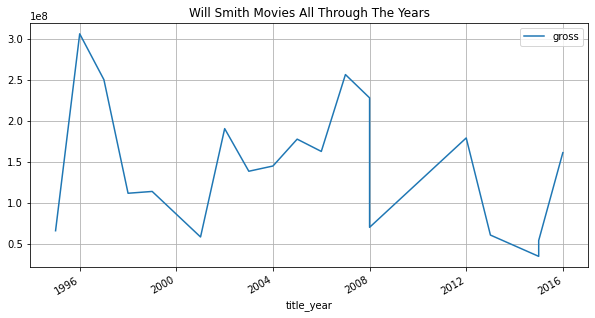

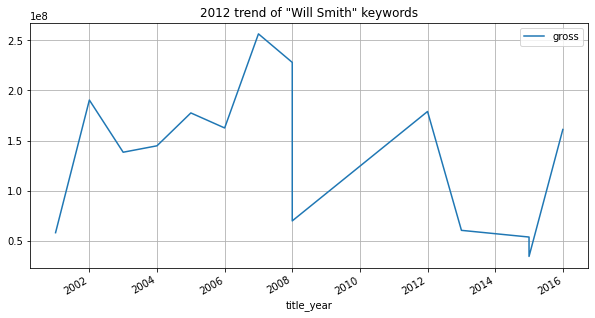

In [ ]:
#movie_data = pd.DataFrame(columns=['title_year'])
#movie_data = movie_data.astype({'title_year':np.datetime64})
#movie_data['title_year'] = movie_data.title_year.astype(np.datetime64)
#movie_data['title_year'] = movie_data.title_year.dt.year
#movie_data.set_index('title_year')

# Convert the date index to datetime
movie_data1['title_year'] = pd.to_datetime(movie_data1['title_year'], format='%Y')
will_smith = movie_data1.set_index('title_year')
print(will_smith)

# Plot the entire time series Will Smith and show gridlines
will_smith.plot(grid=True);
plt.title('Will Smith Movies All Through The Years');

will_smith_2000 = will_smith[will_smith.index.year > 2000]

# Plot Will Smith's > 2000 achievements
will_smith_2000.plot(grid=True);
plt.title('2012 trend of "Will Smith" keywords');

### Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas ```.join()``` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.
Stock prices and 10-year US Government bond yields is downloaded from [FRED](https://fred.stlouisfed.org/)


- Preprocess

In [ ]:
#This dataset will focus on Will Smith and Johnny Depp's Years in Movies
movie_data_will = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1_will = pd.DataFrame(movie_data_will, columns=['title_year'])
movie_data_johnny = df_movie[df_movie["actor_1_name"] == 'Johnny Depp']
movie_data1_johnny = pd.DataFrame(movie_data_johnny, columns=['title_year'])
print(movie_data1_will)
print(movie_data1_johnny)

      title_year
19        2012.0
71        1999.0
73        2016.0
116       2008.0
117       2007.0
152       2002.0
190       2003.0
197       2013.0
272       2001.0
274       2004.0
352       1997.0
409       1998.0
522       1996.0
673       2015.0
842       2005.0
851       2006.0
893       2008.0
1468      2015.0
2052      1995.0
      title_year
1         2007.0
13        2006.0
14        2013.0
18        2011.0
33        2010.0
106       2016.0
118       2005.0
134       2012.0
181       2011.0
205       2003.0
289       2009.0
305       2010.0
343       2014.0
807       2015.0
905       2015.0
945       2014.0
1096      2001.0
1240      2004.0
1354      1999.0
1420      1984.0
1436      1997.0
1449      2001.0
1519      1999.0
1629      2001.0
1642      2005.0
1753      2003.0
1898      2004.0
1946      1994.0
2117      2004.0
2177      1990.0
2389      1998.0
2449      1994.0
3058      1993.0
3170      2010.0
3582      1986.0
3709      1991.0
3817      2016.0
4104      2014

In [ ]:
# Convert the date index to datetime
movie_data1_will['title_year'] = pd.to_datetime(movie_data1_will['title_year'], format='%Y')
will_smith_index = movie_data1_will.set_index('title_year')

movie_data1_johnny['title_year'] = pd.to_datetime(movie_data1_johnny['title_year'], format='%Y')
johnny_depp_index = movie_data1_johnny.set_index('title_year')

print(will_smith_index)
print(johnny_depp_index)

Empty DataFrame
Columns: []
Index: [2012-01-01 00:00:00, 1999-01-01 00:00:00, 2016-01-01 00:00:00, 2008-01-01 00:00:00, 2007-01-01 00:00:00, 2002-01-01 00:00:00, 2003-01-01 00:00:00, 2013-01-01 00:00:00, 2001-01-01 00:00:00, 2004-01-01 00:00:00, 1997-01-01 00:00:00, 1998-01-01 00:00:00, 1996-01-01 00:00:00, 2015-01-01 00:00:00, 2005-01-01 00:00:00, 2006-01-01 00:00:00, 2008-01-01 00:00:00, 2015-01-01 00:00:00, 1995-01-01 00:00:00]
Empty DataFrame
Columns: []
Index: [2007-01-01 00:00:00, 2006-01-01 00:00:00, 2013-01-01 00:00:00, 2011-01-01 00:00:00, 2010-01-01 00:00:00, 2016-01-01 00:00:00, 2005-01-01 00:00:00, 2012-01-01 00:00:00, 2011-01-01 00:00:00, 2003-01-01 00:00:00, 2009-01-01 00:00:00, 2010-01-01 00:00:00, 2014-01-01 00:00:00, 2015-01-01 00:00:00, 2015-01-01 00:00:00, 2014-01-01 00:00:00, 2001-01-01 00:00:00, 2004-01-01 00:00:00, 1999-01-01 00:00:00, 1984-01-01 00:00:00, 1997-01-01 00:00:00, 2001-01-01 00:00:00, 1999-01-01 00:00:00, 2001-01-01 00:00:00, 2005-01-01 00:00:00, 2003

In [ ]:
# Convert the Will Smith and Johnny Depp index into sets
set_will_dates = set(will_smith_index.index)
set_johnny_dates = set(johnny_depp_index.index)

# Take the difference between the sets and print
print(set_will_dates - set_johnny_dates)

# Merge Will Smith and Johnny Depp DataFrame using join()
will_and_johnny = will_smith_index.join(johnny_depp_index, how='inner')

{Timestamp('1995-01-01 00:00:00'), Timestamp('1996-01-01 00:00:00'), Timestamp('2002-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00')}


## Correlation of Two Time Series


### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

In [ ]:
movie_will = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie1_will = pd.DataFrame(movie_will, columns=['title_year', 'gross', 'budget'])
movie1_will['title_year'] = pd.to_datetime(movie1_will['title_year'], format='%Y')
will_smith_index1 = movie1_will.set_index('title_year')
will_smith_index1


,gross,budget
title_year,,
2012-01-01,179020854.0,225000000.0
1999-01-01,113745408.0,170000000.0
2016-01-01,161087183.0,175000000.0
2008-01-01,227946274.0,150000000.0
2007-01-01,256386216.0,150000000.0
2002-01-01,190418803.0,140000000.0
2003-01-01,138396624.0,130000000.0
2013-01-01,60522097.0,130000000.0
2001-01-01,58183966.0,107000000.0


               gross    budget
title_year                    
2012-01-01       NaN       NaN
1999-01-01 -0.364625 -0.244444
2016-01-01  0.416208  0.029412
2008-01-01  0.415049 -0.142857
2007-01-01  0.124766  0.000000
2002-01-01 -0.257297 -0.066667
2003-01-01 -0.273199 -0.071429
2013-01-01 -0.562691  0.000000
2001-01-01 -0.038633 -0.176923
2004-01-01  1.488578  0.121495
1997-01-01  0.727594 -0.250000
1998-01-01 -0.554086  0.000000
1996-01-01  1.744413 -0.166667
2015-01-01 -0.824101 -0.332000
2005-01-01  2.297777  0.397206
2006-01-01 -0.084410 -0.214286
2008-01-01 -0.569755  0.000000
2015-01-01 -0.506348 -0.363636
1995-01-01  0.905692 -0.457143
Correlation of Will Smith's Movie's Gross and Budget:  0.4008459065692696


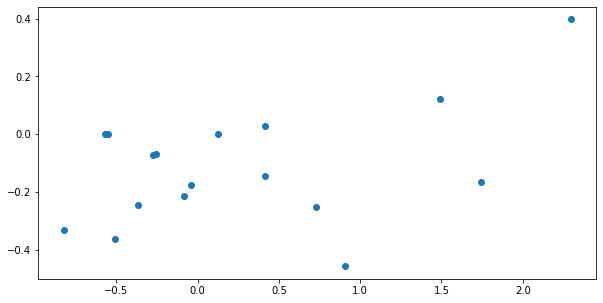

In [ ]:
# Compute percent change using pct_change()
returns = will_smith_index1.pct_change()
print(returns)

# Compute correlation using corr()
correlation = returns['gross'].corr(returns['budget'])
print("Correlation of Will Smith's Movie's Gross and Budget: ", correlation)

# Make scatter plot
plt.scatter(returns['gross'], returns['budget']);

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

UFO data was downloaded from [www.nuforc.org](www.nuforc.org).

- Preprocess

In [ ]:
#This dataset will focus on Will Smith and the Movie's Critic Reviews
movie_data_will1 = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1_will1 = pd.DataFrame(movie_data_will1, columns=['title_year', 'gross'])
movie_data_critic1 = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1_critic1 = pd.DataFrame(movie_data_will1, columns=['title_year', 'num_critic_for_reviews'])
print(movie_data1_will1)
print(movie_data1_critic1)

      title_year        gross
19        2012.0  179020854.0
71        1999.0  113745408.0
73        2016.0  161087183.0
116       2008.0  227946274.0
117       2007.0  256386216.0
152       2002.0  190418803.0
190       2003.0  138396624.0
197       2013.0   60522097.0
272       2001.0   58183966.0
274       2004.0  144795350.0
352       1997.0  250147615.0
409       1998.0  111544445.0
522       1996.0  306124059.0
673       2015.0   53846915.0
842       2005.0  177575142.0
851       2006.0  162586036.0
893       2008.0   69951824.0
1468      2015.0   34531832.0
2052      1995.0   65807024.0
      title_year  num_critic_for_reviews
19        2012.0                   451.0
71        1999.0                    85.0
73        2016.0                   418.0
116       2008.0                   318.0
117       2007.0                   323.0
152       2002.0                   208.0
190       2003.0                    94.0
197       2013.0                   349.0
272       2001.0               

In [ ]:
levels = movie_data1_will1.merge(movie_data1_critic1, how='outer')
levels

,title_year,gross,num_critic_for_reviews
0,2012.0,179020854.0,451.0
1,1999.0,113745408.0,85.0
2,2016.0,161087183.0,418.0
3,2008.0,227946274.0,318.0
4,2008.0,227946274.0,202.0
5,2008.0,69951824.0,318.0
6,2008.0,69951824.0,202.0
7,2007.0,256386216.0,323.0
8,2002.0,190418803.0,208.0
9,2003.0,138396624.0,94.0


In [ ]:
# Convert the date index to datetime
levels['title_year'] = pd.to_datetime(levels['title_year'], format='%Y')
levels_index = levels.set_index('title_year')

print(levels_index)

                  gross  num_critic_for_reviews
title_year                                     
2012-01-01  179020854.0                   451.0
1999-01-01  113745408.0                    85.0
2016-01-01  161087183.0                   418.0
2008-01-01  227946274.0                   318.0
2008-01-01  227946274.0                   202.0
2008-01-01   69951824.0                   318.0
2008-01-01   69951824.0                   202.0
2007-01-01  256386216.0                   323.0
2002-01-01  190418803.0                   208.0
2003-01-01  138396624.0                    94.0
2013-01-01   60522097.0                   349.0
2001-01-01   58183966.0                   174.0
2004-01-01  144795350.0                   225.0
1997-01-01  250147615.0                   175.0
1998-01-01  111544445.0                    81.0
1996-01-01  306124059.0                   185.0
2015-01-01   53846915.0                   279.0
2015-01-01   53846915.0                   219.0
2015-01-01   34531832.0                 

Text(0, 0.5, 'Will Smith All Througout the Year')

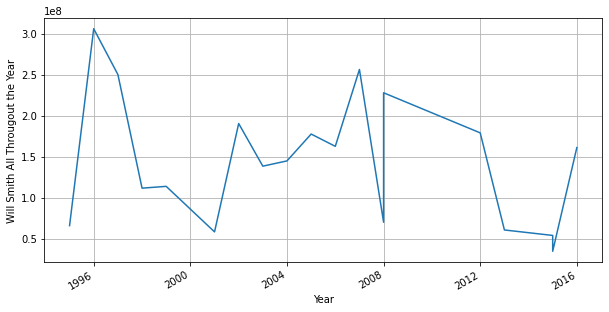

In [ ]:
levels_index.gross.plot(grid=True);
plt.xlabel('Year');
plt.ylabel('Will Smith All Througout the Year')

In [ ]:
# Compute correlation of levels
correlation1 = levels['gross'].corr(levels['num_critic_for_reviews'])
print("Correlation of levels: ", correlation1)

# Compute correlation fo percent changes
changes = levels_index.pct_change()
correlation2 = changes['gross'].corr(changes['num_critic_for_reviews'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.08432177866725717
Correlation of changes:  0.06719720138057018


## Simple Linear Regression
- What is a Regression?
    - Simple linear regression: $y_t = \alpha + \beta x_t + \epsilon_t$
- Relationship between R-Squared and Correlation
    - $[corr(x, y)]^2 = R^2$
    - $sign(corr) = sign(\text{regression slope})$

### Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package ```statsmodels```, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, ```x``` and ```y```, compute their correlation, and then regress ```y``` on ```x``` using the function ```OLS(y,x)``` in the ```statsmodels.api``` library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$ in the regression $y_t = \alpha + \beta x_t + \epsilon_t$). To include a constant using the function ```OLS()```, you need to add a column of 1's to the right hand side of the regression.

- Preprocess

In [ ]:
movie_data_will = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1_will = pd.DataFrame(movie_data_will, columns=['title_year', 'gross', 'budget'])

x = movie_data1_will.reset_index(drop=True)['gross']
y = movie_data1_will.reset_index(drop=True)['budget']

In [ ]:
print(x)
print(y)

0     179020854.0
1     113745408.0
2     161087183.0
3     227946274.0
4     256386216.0
5     190418803.0
6     138396624.0
7      60522097.0
8      58183966.0
9     144795350.0
10    250147615.0
11    111544445.0
12    306124059.0
13     53846915.0
14    177575142.0
15    162586036.0
16     69951824.0
17     34531832.0
18     65807024.0
Name: gross, dtype: float64
0     225000000.0
1     170000000.0
2     175000000.0
3     150000000.0
4     150000000.0
5     140000000.0
6     130000000.0
7     130000000.0
8     107000000.0
9     120000000.0
10     90000000.0
11     90000000.0
12     75000000.0
13     50100000.0
14     70000000.0
15     55000000.0
16     55000000.0
17     35000000.0
18     19000000.0
Name: budget, dtype: float64


In [ ]:
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['gross'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.35
                            OLS Regression Results                            
Dep. Variable:                 budget   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.298
Date:                Sun, 09 Oct 2022   Prob (F-statistic):              0.148
Time:                        16:30:02   Log-Likelihood:                -363.63
No. Observations:                  19   AIC:                             731.3
Df Residuals:                      17   BIC:                             733.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## Autocorrelation
- Correlation of a time series with a lagged copy of itself
- Lag-one autocorrelation
- Also called **serial correlation**

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame ```MSFT``` of daily prices. You should use the ```.resample()``` method to get weekly prices and then compute returns from prices. Use the pandas method ```.autocorr()``` to get the autocorrelation and show that the autocorrelation is negative. Note that the ```.autocorr()``` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

- Preprocess

In [ ]:
movie_data = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])

movie_data1['title_year'] = pd.to_datetime(movie_data1['title_year'], format='%Y')
will_smith = movie_data1.set_index('title_year')
will_smith_pd = pd.DataFrame(will_smith)
will_smith_pd 


,gross
title_year,
2012-01-01,179020854.0
1999-01-01,113745408.0
2016-01-01,161087183.0
2008-01-01,227946274.0
2007-01-01,256386216.0
2002-01-01,190418803.0
2003-01-01,138396624.0
2013-01-01,60522097.0
2001-01-01,58183966.0


In [ ]:
# Convert the data to yearly data
#Note: We cannot convert the data given into weekly since the only given on the dataset is year
will_smith_pd1 = will_smith_pd.resample(rule='A').last()

# Compute the percentage change of prices
returns = will_smith_pd1.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['gross'].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

                  gross
title_year             
1995-12-31   65807024.0
1996-12-31  306124059.0
1997-12-31  250147615.0
1998-12-31  111544445.0
1999-12-31  113745408.0
2000-12-31          NaN
2001-12-31   58183966.0
2002-12-31  190418803.0
2003-12-31  138396624.0
2004-12-31  144795350.0
2005-12-31  177575142.0
2006-12-31  162586036.0
2007-12-31  256386216.0
2008-12-31   69951824.0
2009-12-31          NaN
2010-12-31          NaN
2011-12-31          NaN
2012-12-31  179020854.0
2013-12-31   60522097.0
2014-12-31          NaN
2015-12-31   34531832.0
2016-12-31  161087183.0
The auto correlation of weekly returns is -0.30


### Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

- Preprocess

In [ ]:
movie_data = df_movie[df_movie["actor_1_name"] == 'Will Smith']
movie_data1 = pd.DataFrame(movie_data, columns=['title_year', 'gross'])

movie_data1['title_year'] = pd.to_datetime(movie_data1['title_year'], format='%Y')
will_smith = movie_data1.set_index('title_year')
will_smith_pd = pd.DataFrame(will_smith)
will_smith_pd 

,gross
title_year,
2012-01-01,179020854.0
1999-01-01,113745408.0
2016-01-01,161087183.0
2008-01-01,227946274.0
2007-01-01,256386216.0
2002-01-01,190418803.0
2003-01-01,138396624.0
2013-01-01,60522097.0
2001-01-01,58183966.0


In [ ]:
# Compute the daily change in interest rates
will_smith_pd_diff = will_smith_pd.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = will_smith_pd_diff['gross'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = will_smith_pd.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['gross'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is -0.55
The autocorrelation of annual interest rate changes is -0.31
